<a href="https://colab.research.google.com/github/Aladin-Z/Aladin-Z/blob/main/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MNIST Handwritten Digit Recognition Using Pytorch**
############################

MNIST dataset consists of 60,000 images of hand written digit. Where each image has size 28X28. It consists of 10 different classes ranging from 0–9


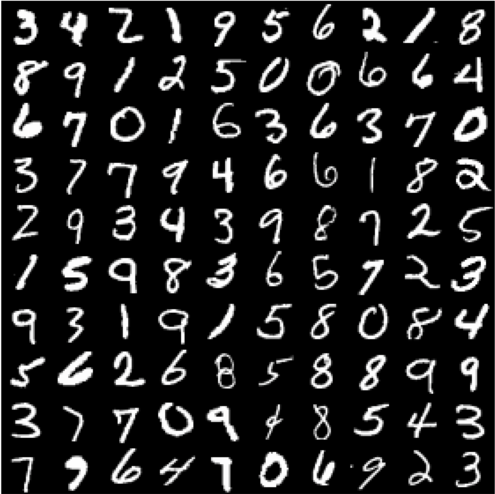

In [1]:
#Importing libraries
import torch
import torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn as nn
from torchvision.transforms import transforms
import torch.nn.functional as F

**Parameter Initialization**

In [ ]:
input_size=784   #28X28 pixel of image
hidden_size1=200 #size of 1st hidden layer(number of perceptron)
hidden_size2=150 #size of second hidden layer
hidden_size3=100 #size of third hidden layer
hidden_size=80   #size of fourth hidden layer
output =10       #output layer
bach_size=100
lr_rate=0.01
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

**MNIST dataset is already present inside torch vision library.**

In [ ]:
train_dataset=torchvision.datasets.MNIST('/content',train=True,transform = transform, download=True)

In [ ]:
test_dataset=torchvision.datasets.MNIST('/content',train=False, transform = transform,download = True)

In [ ]:
#lets see shape of train and test dataset
print(train_dataset)
print(test_dataset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: /content
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )
Dataset MNIST
    Number of datapoints: 10000
    Root location: /content
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )


**Taking train data loader and test data loader for further operation.**

In [ ]:
train_dataloader=torch.utils.data.DataLoader(dataset=train_dataset, 
                                  batch_size=256,shuffle=True,drop_last=True)
test_dataloader=torch.utils.data.DataLoader(dataset=test_dataset, 
                                  batch_size=256,shuffle=True,drop_last=True)

In [ ]:
# #lets see how test/train loader is working
# for batch_idx, sample in enumerate(train_dataloader):
#   input = sample
#   print(input.size)
  
# print ("//////////////////////////Test dataset//////////////////////////")
# for batch_idx, sample in enumerate(test_dataloader):
#   input = sample
#   print(type(input))

let’s see the shape of the data data that has been passed in batch

In [ ]:
data=iter(train_dataloader)
samples,labels=next(data)
print(f"number of samples{samples.shape}")
print(f"number of labels {labels.shape}")

number of samplestorch.Size([256, 1, 28, 28])
number of labels torch.Size([256])


**Printing Images from dataset.**

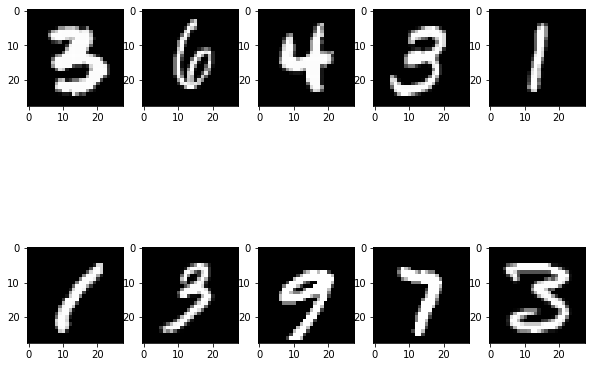

In [ ]:
plt.figure(figsize = (10,8))
for i in range(10):
  plt.subplot(2,5, i+1)
  plt.imshow(samples[i][0], cmap = 'gray')

Designing NN.
Using fully connected layers (4 layers)

In [ ]:
class MNIST(nn.Module):
  def __init__(self,input_size,hidden_size1,hidden_size2
               ,hidden_size3,hidden_size,output):
    super(MNIST,self).__init__()
    self.f_connected1 = nn.Linear(input_size,hidden_size1)
    self.f_connected2 = nn.Linear(hidden_size1,hidden_size2)
    self.f_connected3 = nn.Linear(hidden_size2,hidden_size3)
    self.f_connected4 = nn.Linear(hidden_size3,hidden_size)
    self.out_connected = nn.Linear(hidden_size,output)


  def forward(self,x):
    out = F.relu(self.f_connected1(x))
    out = F.relu(self.f_connected2(out))
    out = F.relu(self.f_connected3(out))
    out = F.relu(self.f_connected4(out))
    out = self.out_connected(out)
    return out

In [ ]:
#check the shape of dataset
print("train_dataset", train_dataset)

train_dataset Dataset MNIST
    Number of datapoints: 60000
    Root location: /content
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )


In [ ]:
Mnist_model=MNIST(input_size,hidden_size1,hidden_size2
                       ,hidden_size3,hidden_size,output)
#calling the object that has been created inside MNIST class

Printing the model structure.
numer of layer and all connections. **bold text**

In [ ]:
print(Mnist_model)

MNIST(
  (f_connected1): Linear(in_features=784, out_features=200, bias=True)
  (f_connected2): Linear(in_features=200, out_features=150, bias=True)
  (f_connected3): Linear(in_features=150, out_features=100, bias=True)
  (f_connected4): Linear(in_features=100, out_features=80, bias=True)
  (out_connected): Linear(in_features=80, out_features=10, bias=True)
)


**Constructing loss and optimize for the model**

In [ ]:
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(Mnist_model.parameters(), lr = lr_rate)

# Its time to train the model over iterations :)

In [ ]:
#trainign on GPU
num_epochs = 10
for epoch in range(num_epochs):
  for i ,(images,labels) in enumerate(train_dataloader):
    images = images.reshape(-1,28*28)
    images = images.cuda()
    #forward connection
    Mnist_model = Mnist_model.cuda()
    output = Mnist_model(images).cuda()
    labels = labels.cuda()
    Loss = loss(output,labels)
    optimizer.zero_grad()
    Loss.backward()
    optimizer.step()

    if (i+1)%100 ==0:
      print(('\r Train Epoch : {}/{} \tLoss : {:.5f}'.format (epoch+1,num_epochs,Loss)))

 Train Epoch : 1/10 	Loss : 0.26041
 Train Epoch : 1/10 	Loss : 0.29508
 Train Epoch : 2/10 	Loss : 0.32463
 Train Epoch : 2/10 	Loss : 0.24687
 Train Epoch : 3/10 	Loss : 0.12387
 Train Epoch : 3/10 	Loss : 0.15707
 Train Epoch : 4/10 	Loss : 0.13734
 Train Epoch : 4/10 	Loss : 0.10121
 Train Epoch : 5/10 	Loss : 0.21110
 Train Epoch : 5/10 	Loss : 0.19558
 Train Epoch : 6/10 	Loss : 0.13939
 Train Epoch : 6/10 	Loss : 0.16897
 Train Epoch : 7/10 	Loss : 0.09914
 Train Epoch : 7/10 	Loss : 0.09904
 Train Epoch : 8/10 	Loss : 0.15983
 Train Epoch : 8/10 	Loss : 0.16284
 Train Epoch : 9/10 	Loss : 0.10748
 Train Epoch : 9/10 	Loss : 0.17380
 Train Epoch : 10/10 	Loss : 0.11202
 Train Epoch : 10/10 	Loss : 0.09193


In [ ]:
#trainign on CPU
num_epochs = 10
for epoch in range(num_epochs):
  for i ,(images,labels) in enumerate(train_dataloader):
    images = images.reshape(-1,28*28)
    #forward connection
    Mnist_model = Mnist_model
    output = Mnist_model(images)
    Loss = loss(output,labels)
    optimizer.zero_grad()
    Loss.backward()
    optimizer.step()

    if (i+1)%100 ==0:
      print(('\r Train Epoch : {}/{} \tLoss : {:.5f}'.format (epoch+1,num_epochs,Loss)))

 Train Epoch : 1/10 	Loss : 0.49077
 Train Epoch : 1/10 	Loss : 0.29010
 Train Epoch : 2/10 	Loss : 0.24388
 Train Epoch : 2/10 	Loss : 0.13222
 Train Epoch : 3/10 	Loss : 0.21531
 Train Epoch : 3/10 	Loss : 0.07995
 Train Epoch : 4/10 	Loss : 0.13820
 Train Epoch : 4/10 	Loss : 0.25500
 Train Epoch : 5/10 	Loss : 0.07519
 Train Epoch : 5/10 	Loss : 0.14256
 Train Epoch : 6/10 	Loss : 0.14144
 Train Epoch : 6/10 	Loss : 0.13869
 Train Epoch : 7/10 	Loss : 0.13373
 Train Epoch : 7/10 	Loss : 0.09203
 Train Epoch : 8/10 	Loss : 0.07375
 Train Epoch : 8/10 	Loss : 0.12203
 Train Epoch : 9/10 	Loss : 0.12257
 Train Epoch : 9/10 	Loss : 0.06126
 Train Epoch : 10/10 	Loss : 0.11860
 Train Epoch : 10/10 	Loss : 0.08455


In [ ]:
#check the accuracy of the model on GPU
with torch.no_grad():
  n_correct = 0
  n_samples = 0

  for images,labels in test_dataloader:
    images = images.reshape(-1,28*28)
    images = images.cuda()
    output = Mnist_model(images).cuda()
    labels = labels.cuda()
    _,prediction = torch.max(output,1)
    n_samples = labels.shape[0]
    n_correct = (prediction == labels).sum().item()
  
  accuracy = (n_correct/n_samples)*100

In [ ]:
#check the accuracy of the model on CPU
with torch.no_grad():
  n_correct = 0
  n_samples = 0

  for images,labels in test_dataloader:
    images = images.reshape(-1,28*28)
    output = Mnist_model(images)
    labels = labels
    _,prediction = torch.max(output,1)
    n_samples = labels.shape[0]
    n_correct = (prediction == labels).sum().item()
  
  accuracy = (n_correct/n_samples)*100

In [ ]:
print(accuracy)

98.4375
